In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
sns.set(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (8, 5)

# Loading the cleaned dataset

In [20]:
df = pd.read_csv("../data/real_estate_listings_clean.csv")

In [28]:
df

,energy,heating,price,area,rooms,fee,zipcode,construction_year,level,price_per_area
0,Öl,Zentralheizung,249000,64.00,3,3.57,13505,1971,2,3890.625000
1,Gas,"Fußbodenheizung, offener",1295000,136.06,4,3.57,10405,1900,5,9517.859768
2,Gas,Etagenheizung,770000,120.00,4,3.57,12161,1900,5,6416.666667
3,Gas,Zentralheizung,349000,158.00,5,3.57,12103,1956,1,2208.860759
4,Gas,Etagenheizung,494990,126.00,4,3.57,12157,1909,3,3928.492063
...,...,...,...,...,...,...,...,...,...,...
4319,Fernwärme,"Fußbodenheizung,",429000,78.00,3,3.57,13595,2000,1,5500.000000
4320,Gas,Zentralheizung,729000,150.00,4,3.57,13467,1990,1,4860.000000
4321,Gas,Etagenheizung,695600,94.00,3,3.57,10115,1900,1,7400.000000
4322,Fernwärme,Minergie zertifiziert,839251,107.00,3,3.57,13591,1894,1,7843.467290


## Observations from Price Distribution
- Price is highly right-skewed, with most listings under €1M but some up to €15M.
- Log transformation of price produces a more symmetric distribution, which may benefit modeling.

In [69]:
df['log_price'] = np.log1p(df['price'])
df['log_area'] = np.log1p(df['area'])
df['log_price_per_area'] = np.log1p(df['price_per_area'])

In [71]:
df

,energy,heating,price,area,rooms,fee,zipcode,construction_year,level,price_per_area,log_price,log_area,log_price_per_area
0,Öl,Zentralheizung,249000,64.00,3,3.57,13505,1971,2,3890.625000,12.425212,4.174387,8.266582
1,Gas,"Fußbodenheizung, offener",1295000,136.06,4,3.57,10405,1900,5,9517.859768,14.074022,4.920419,9.161030
2,Gas,Etagenheizung,770000,120.00,4,3.57,12161,1900,5,6416.666667,13.554147,4.795791,8.766810
3,Gas,Zentralheizung,349000,158.00,5,3.57,12103,1956,1,2208.860759,12.762830,5.068904,7.700685
4,Gas,Etagenheizung,494990,126.00,4,3.57,12157,1909,3,3928.492063,13.112295,4.844187,8.276265
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4319,Fernwärme,"Fußbodenheizung,",429000,78.00,3,3.57,13595,2000,1,5500.000000,12.969215,4.369448,8.612685
4320,Gas,Zentralheizung,729000,150.00,4,3.57,13467,1990,1,4860.000000,13.499430,5.017280,8.488999
4321,Gas,Etagenheizung,695600,94.00,3,3.57,10115,1900,1,7400.000000,13.452531,4.553877,8.909370
4322,Fernwärme,Minergie zertifiziert,839251,107.00,3,3.57,13591,1894,1,7843.467290,13.640266,4.682131,8.967564


# Data overview

In [74]:
print("Shape of dataset:", df.shape)

Shape of dataset: (4324, 13)


In [76]:
print("\nData Types:\n", df.dtypes)


Data Types:
 energy                 object
heating                object
price                   int64
area                  float64
rooms                   int64
fee                   float64
zipcode                 int64
construction_year       int64
level                   int64
price_per_area        float64
log_price             float64
log_area              float64
log_price_per_area    float64
dtype: object


In [78]:
print("\nMissing Values:\n", df.isnull().sum())



Missing Values:
 energy                0
heating               0
price                 0
area                  0
rooms                 0
fee                   0
zipcode               0
construction_year     0
level                 0
price_per_area        0
log_price             0
log_area              0
log_price_per_area    0
dtype: int64


In [80]:
print("\nFirst Rows:\n", df.head())


First Rows:
   energy                    heating    price    area  rooms   fee  zipcode  \
0     Öl             Zentralheizung   249000   64.00      3  3.57    13505   
1    Gas  Fußbodenheizung, offener   1295000  136.06      4  3.57    10405   
2    Gas              Etagenheizung   770000  120.00      4  3.57    12161   
3    Gas             Zentralheizung   349000  158.00      5  3.57    12103   
4    Gas              Etagenheizung   494990  126.00      4  3.57    12157   

   construction_year  level  price_per_area  log_price  log_area  \
0               1971      2     3890.625000  12.425212  4.174387   
1               1900      5     9517.859768  14.074022  4.920419   
2               1900      5     6416.666667  13.554147  4.795791   
3               1956      1     2208.860759  12.762830  5.068904   
4               1909      3     3928.492063  13.112295  4.844187   

   log_price_per_area  
0            8.266582  
1            9.161030  
2            8.766810  
3           

# summary stats

In [83]:
print("\nNumerical Summary:\n", df.describe())


Numerical Summary:
               price         area        rooms          fee       zipcode  \
count  4.324000e+03  4324.000000  4324.000000  4324.000000   4324.000000   
mean   5.753163e+05    87.060735     2.820074     6.218501  11884.682932   
std    6.319716e+05    59.304270     1.572963   129.361832   1672.144550   
min    3.495000e+04    13.000000     1.000000     0.000000   1099.000000   
25%    2.680000e+05    55.337500     2.000000     3.570000  10587.000000   
50%    3.914500e+05    73.015000     3.000000     3.570000  12109.000000   
75%    6.610000e+05   102.007500     3.000000     3.570000  13088.000000   
max    1.590000e+07   970.000000    26.000000  7996.000000  77933.000000   

       construction_year        level  price_per_area    log_price  \
count        4324.000000  4324.000000     4324.000000  4324.000000   
mean         1939.268270     2.997225     6278.987003    12.986318   
std           151.787272    30.933536     3060.744740     0.678709   
min           

In [85]:
print("\nCategorical Summary:\n", df.select_dtypes(include='object').describe())


Categorical Summary:
        energy         heating
count    4324            4324
unique     20              23
top        na  Zentralheizung
freq     1723            1733


# Univariate Analysis

In [87]:
numeric_cols = [
    'price', 'area', 'rooms', 'fee', 'price_per_area', 
    'log_price', 'log_area', 'log_price_per_area'
]
cat_cols = ['energy', 'heating', 'zipcode']

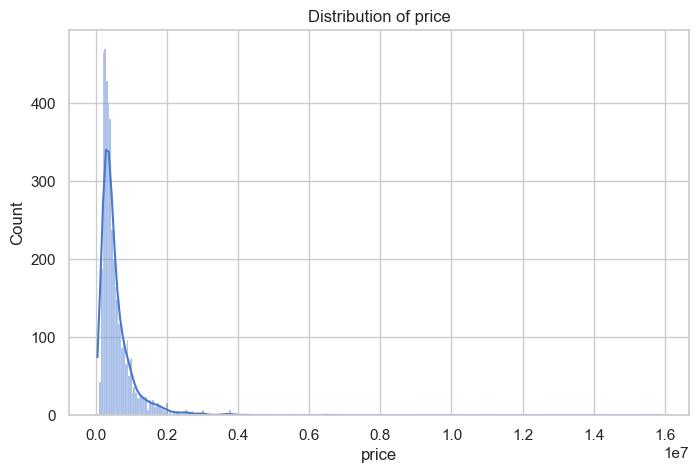

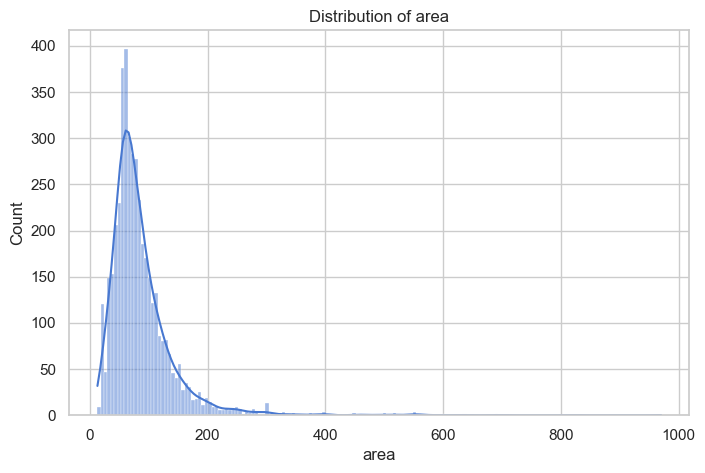

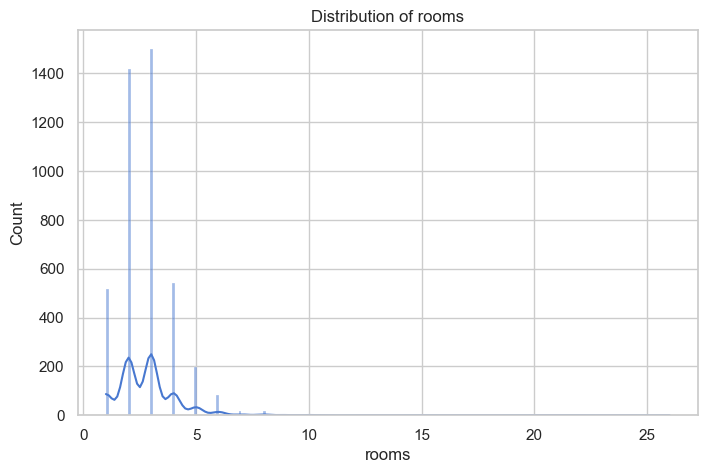

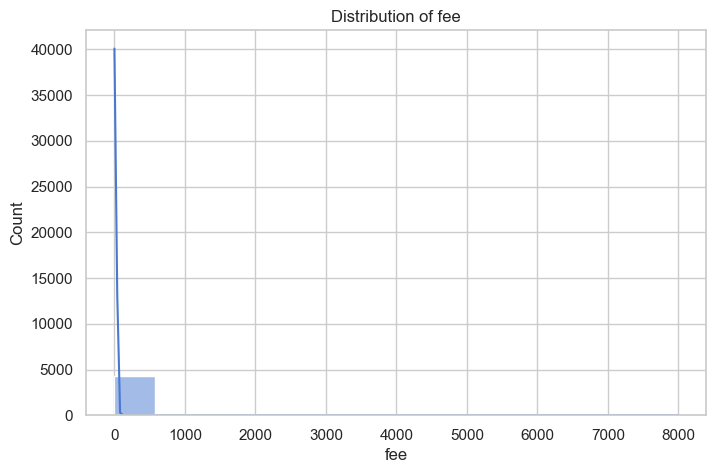

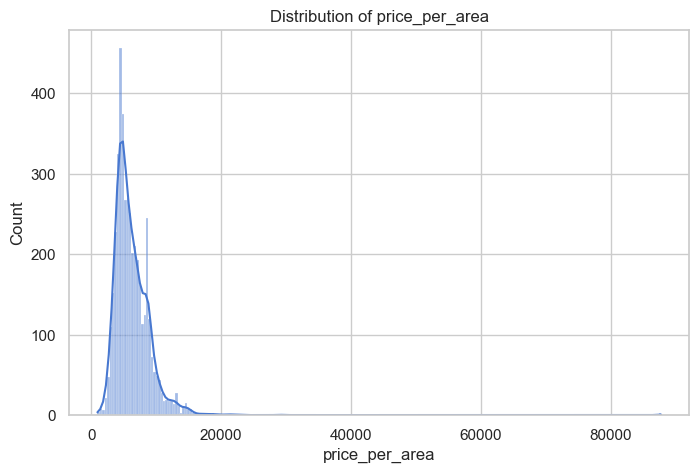

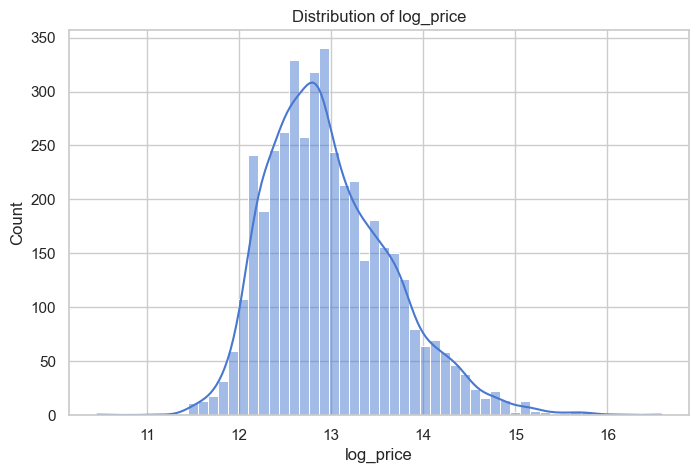

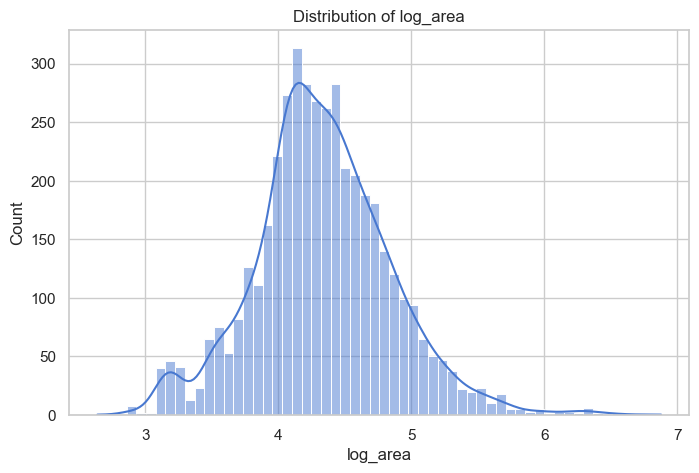

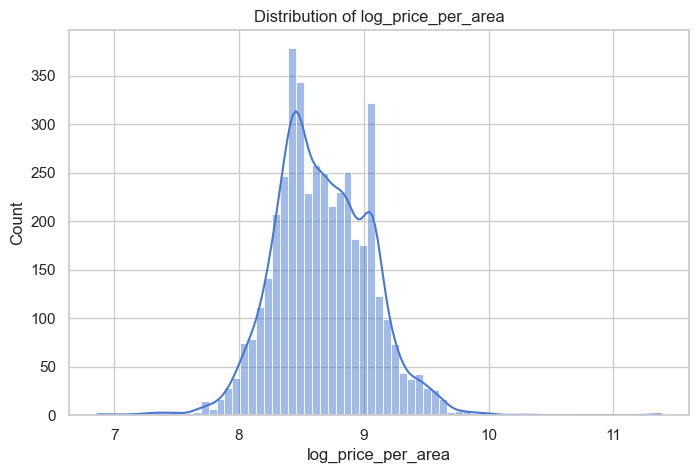

In [89]:
# Histograms
for col in numeric_cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

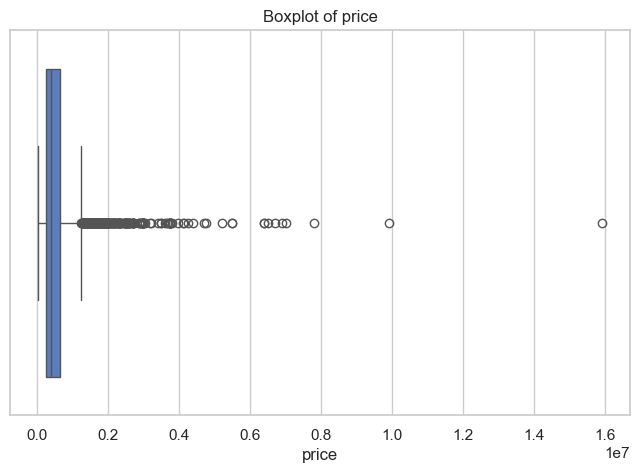

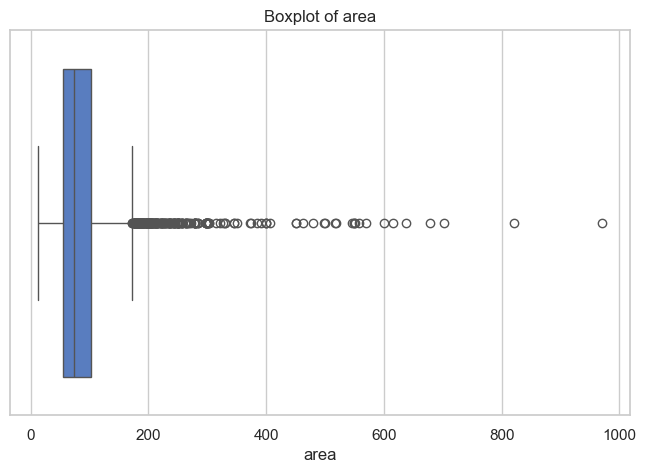

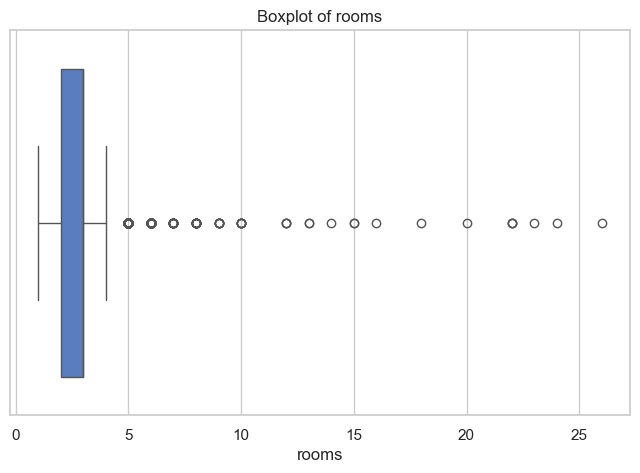

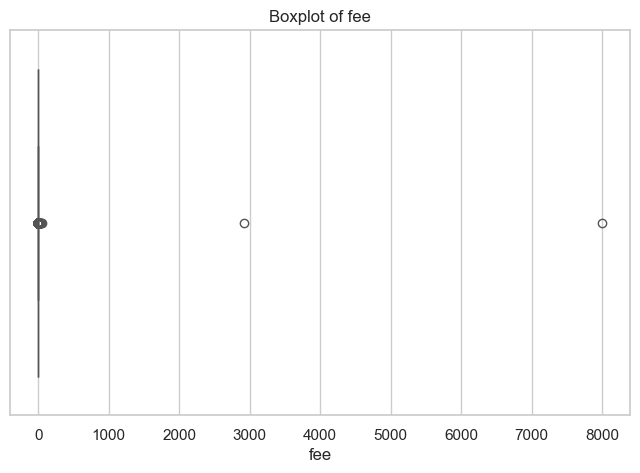

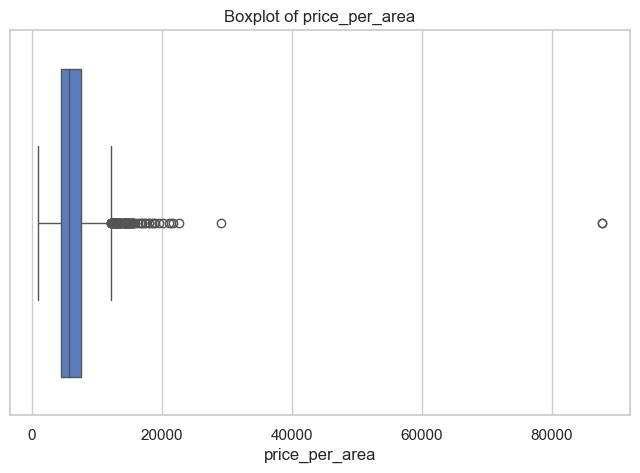

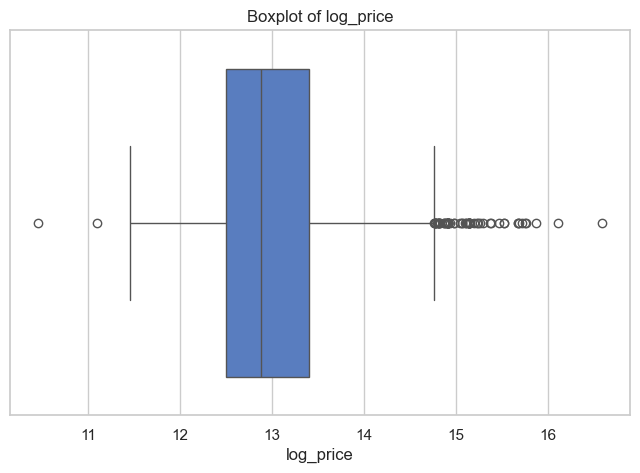

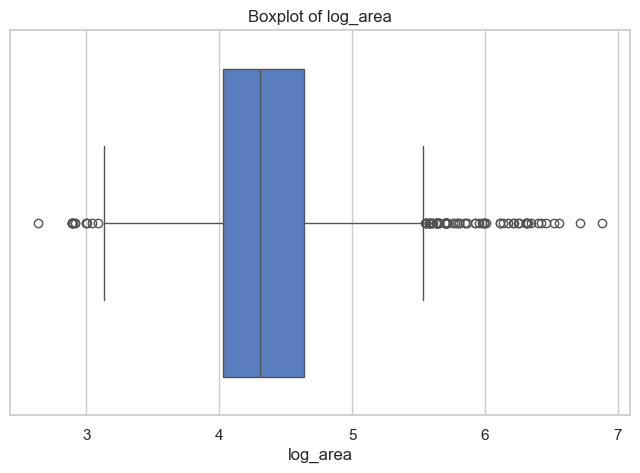

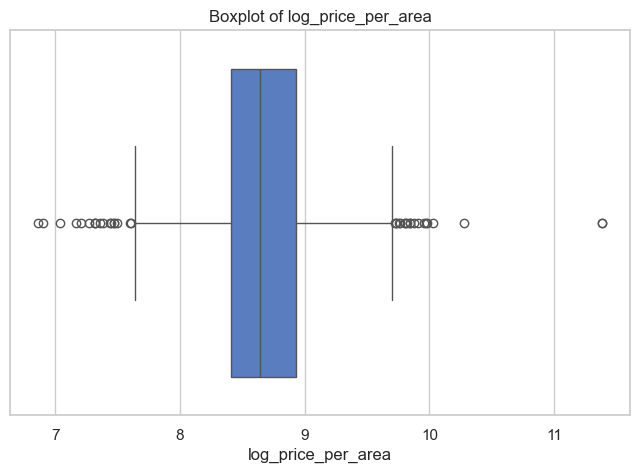

In [91]:
# Boxplots (outlier detection)
for col in numeric_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

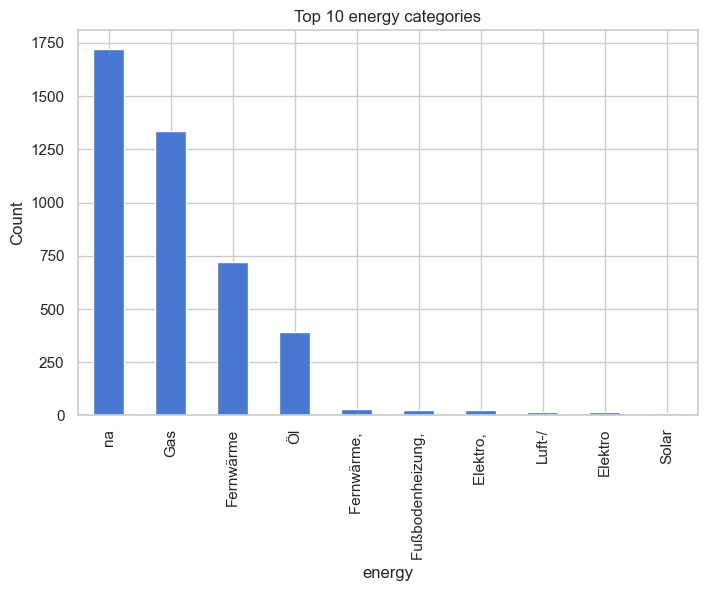

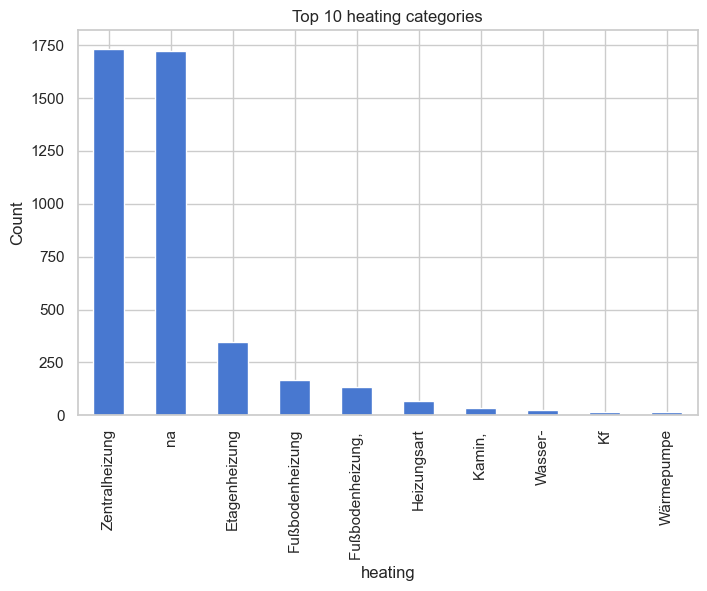

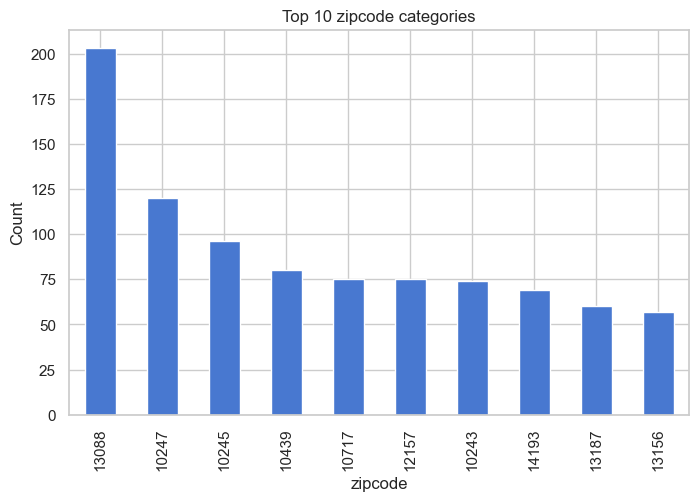

In [57]:
# Categorical counts
for col in cat_cols:
    plt.figure()
    df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f"Top 10 {col} categories")
    plt.ylabel("Count")
    plt.show()

# Bivariate Analysis

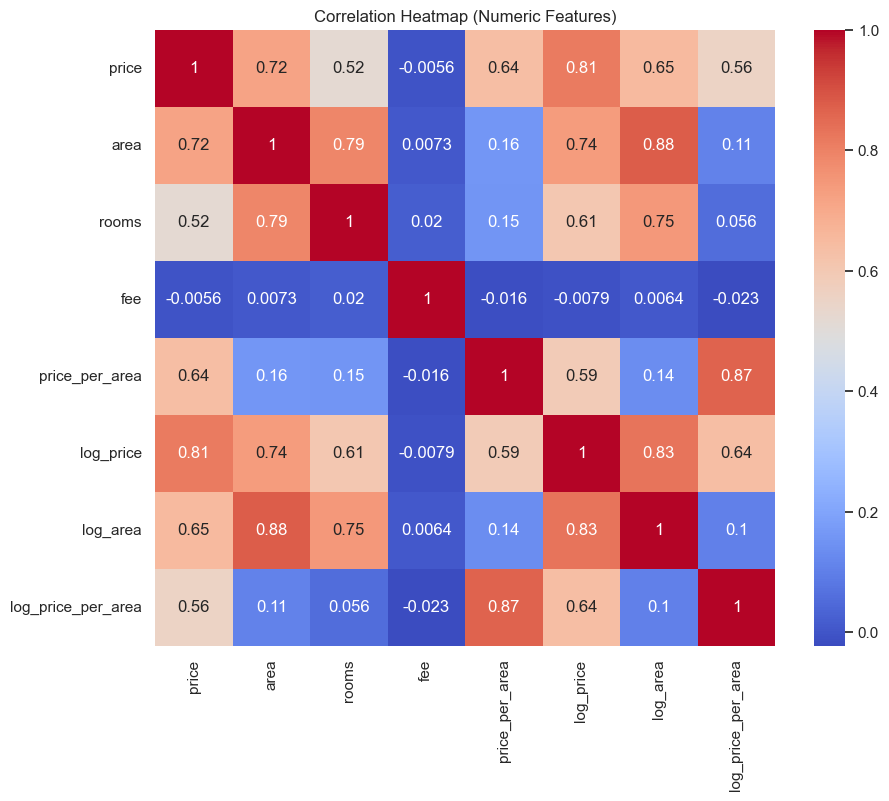

In [93]:
# Correlation heatmap
plt.figure(figsize=(10,8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

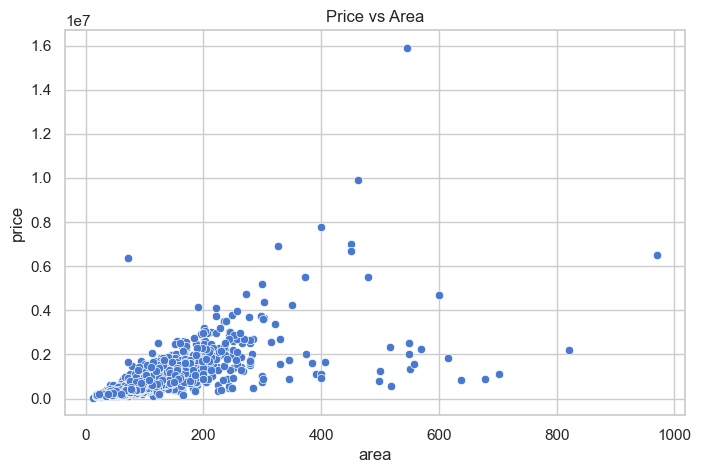

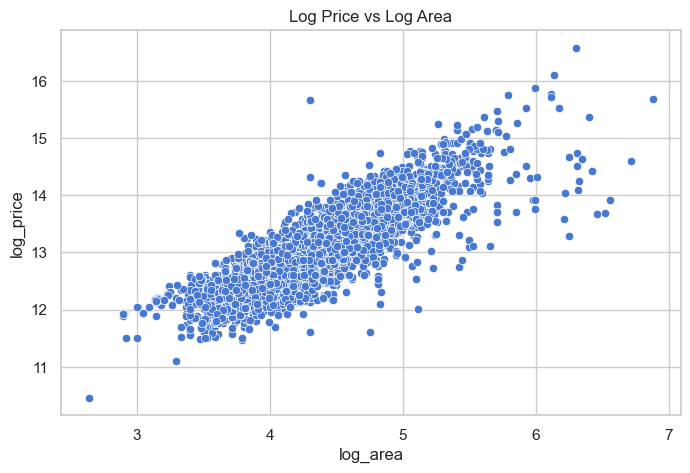

In [95]:
# Price vs Area (raw and log)
plt.figure()
sns.scatterplot(x='area', y='price', data=df)
plt.title("Price vs Area")
plt.show()

plt.figure()
sns.scatterplot(x='log_area', y='log_price', data=df)
plt.title("Log Price vs Log Area")
plt.show()

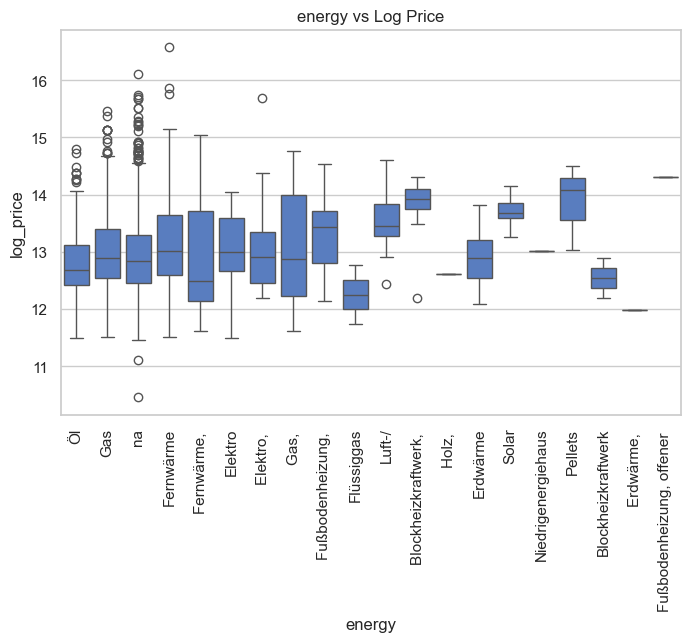

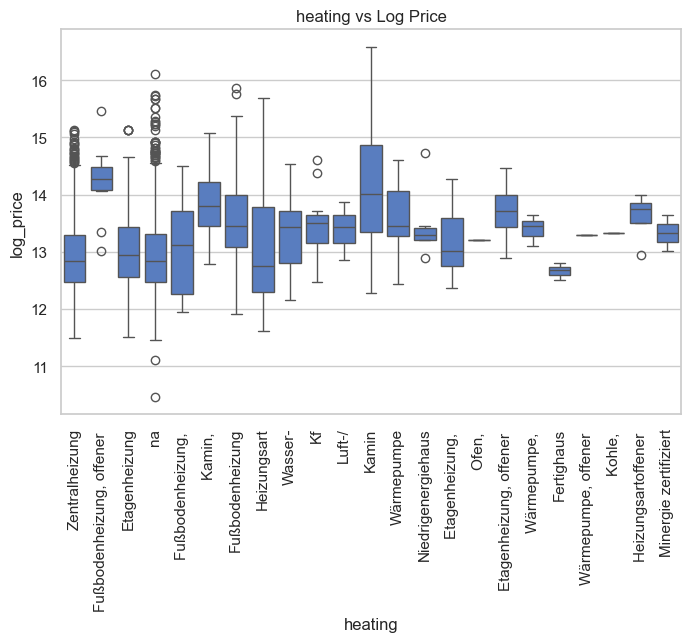

In [101]:
# Boxplots: categorical vs log_price
for col in ['energy', 'heating']:
    plt.figure()
    sns.boxplot(x=col, y='log_price', data=df)
    plt.title(f"{col} vs Log Price")
    plt.xticks(rotation=90)
    plt.show()

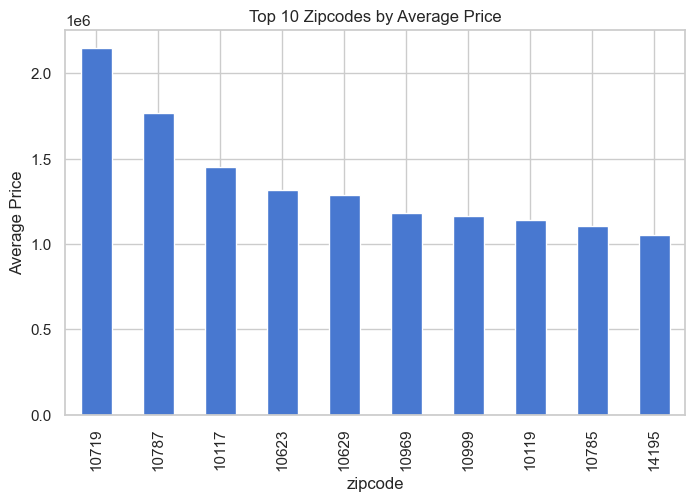

In [97]:
# Zipcode vs Average Price
top_zipcodes = df.groupby('zipcode')['price'].mean().sort_values(ascending=False).head(10)
plt.figure()
top_zipcodes.plot(kind='bar')
plt.title("Top 10 Zipcodes by Average Price")
plt.ylabel("Average Price")
plt.show()

# Multivariate Analysis

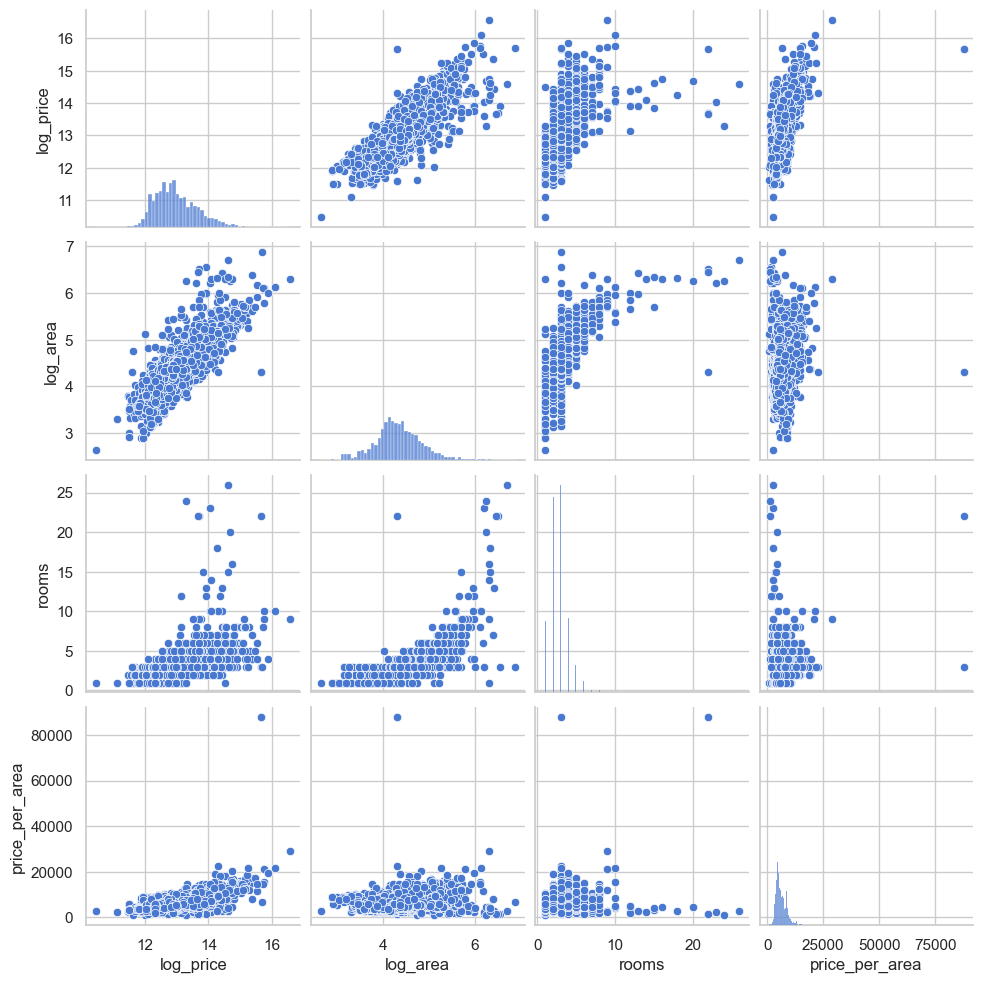

In [104]:
sns.pairplot(df[['log_price', 'log_area', 'rooms', 'price_per_area']])
plt.show()

# Data Quality Checks

In [107]:
invalid_years = df[(df['construction_year'] < 1800) | (df['construction_year'] > 2025)]
print("\nProperties with invalid construction years:\n", invalid_years)


Properties with invalid construction years:
          energy          heating    price    area  rooms    fee  zipcode  \
176          na               na   260126   62.79      2   8.96    10245   
741         Gas   Zentralheizung   279000   63.75      2   3.57    13053   
1589         na               na  1355000  144.00      4   3.57    10179   
1660  Fernwärme   Zentralheizung  2460000  188.00      4   3.57    14193   
1752         na               na   709000   78.35      3   3.57    13156   
1753         na               na   461000   50.61      2   3.57    13156   
1769         na               na   415000   45.35      2   3.57    13156   
1770         na               na   640000   70.33      3   3.57    13156   
1771         na               na  1187000  130.12      4   3.57    13156   
1772         na               na   392000   41.70      2   3.57    13156   
1773         na               na   909000   92.77      3   3.57    13156   
1774         na               na  1043000 

In [109]:
# Convert zipcode to string for modeling
df['zipcode'] = df['zipcode'].astype(str)